## Задание:
Поддерживать и стимулировать пользовательскую активность – важная задача для продукта, подобного нашему. Для этого наша команда маркетологов решила организовать флэшмоб в ленте новостей: участники должны сделать пост, где они рассказывают какой-то интересный факт о себе, и опубликовать его с хэштегом. Три поста, собравших наибольшее число лайков, получают призы.

Флэшмоб проходил с 2023-07-14 по 2023-07-20. Ваша задача как аналитика – оценить эффективность этого мероприятия.

1. Предположите, какие метрики должны были измениться во время флэшмоба и как. Почему? Предложите не менее 5 метрик.
2. Проверьте, реально ли эти метрики изменились, используя CausalImpact. Если изменение действительно произошло - опишите, как именно изменилась метрика и насколько.
3. Необязательно: имел ли флэшмоб какие-то долгосрочные эффекты? 
Сделайте выводы по полученным результатам.

## Участие в флэшмобе может повлиять на следующие метрики:
1. Количество постов: количество постов может увеличиться, так как пользователи будут заинтересованы в участии во флешмобе.
2. Просмотры: количество просмотров постов в ленте новостей может увеличиться, так как пользователи будут заинтересованы в интересных фактах о других участниках и будут активнее просматривать такие посты.
3. Лайки: количество лайков под постами может значительно увеличиться, так как люди будут голосовать за посты, которые им понравились. Также, из-за конкурсного характера флэшмоба, пользователи, участвующие в нем, могут активнее лайкать посты других участников, чтобы привлечь внимание к своему посту. А также просить проголосовать своих знакомых.
4. DAU: количество активных ежедневных пользователей может возрасти, так как флэшмоб вызывает интерес и удерживает пользователей в приложении на более длительное время.
5. CTR: вероятность того, что пользователи будут нажимать на посты с интересными фактами и хэштегами, также может увеличиться. Флэшмоб стимулирует пользователей быть более вовлеченными в контент, что может повысить CTR.

In [1]:
# Импортируем необходимые библиотеки
import pandas as pd
import pandahouse as ph
import numpy as np
from causalimpact import CausalImpact
import seaborn as sns
import matplotlib.pyplot as plt

2023-08-11 07:44:41.661271: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-11 07:44:41.777752: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-11 07:44:41.778864: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-11 07:44:43.269558: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# Подключаемся к БД

connection = {'host': 'https://clickhouse.lab.karpov.courses',
                      'database':'simulator_20230720',
                      'user':'student', 
                      'password':'dpo_python_2020'
                     }

In [25]:
# Делаем запрос необходимых метрик
q = """
SELECT toDate(time) AS date, uniqExact(post_id) as posts, uniqExact(user_id) AS dau,
    sum(action = 'like') as likes,
    sum(action = 'view') as views,
    likes/views as ctr
FROM {db}.feed_actions 
GROUP BY date
"""

df = ph.read_clickhouse(q, connection=connection)
df.set_index('date', inplace=True, drop=False)


## Проверяем изменилось ли количество постов в день

In [26]:
impact_posts = CausalImpact(data=pd.Series(df.posts), #данные
                      pre_period=['2023-06-13', '2023-07-13'], #период до события
                      post_period=['2023-07-14', '2023-07-20']) #период после события

2023-08-11 08:22:07.001511: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma/sample/InverseGamma/sample/PartitionedCall}}]]
2023-08-11 08:22:07.036770: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma/sample_1/InverseGamma/sample/PartitionedCall}}]]
2023-08-11 08:22:07.790316: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma_CONSTRUCTED_AT_joint_log_prob/sample/InverseGamma/sample/PartitionedCall}}]]
2023-08-11 08:

2023-08-11 08:22:28.959917: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'AdditiveStateSpaceModel/sample/AdditiveStateSpaceModel/sample_n_joint/scan/while/strided_slice/AdditiveStateSpaceModel/sample/AdditiveStateSpaceModel/sample_n_joint/concat_1' with dtype int32 and shape [2]
	 [[{{node AdditiveStateSpaceModel/sample/AdditiveStateSpaceModel/sample_n_joint/scan/while/strided_slice/AdditiveStateSpaceModel/sample/AdditiveStateSpaceModel/sample_n_joint/concat_1}}]]
2023-08-11 08:22:29.120151: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'AdditiveStateSpaceModel/sample/AdditiveStateSpaceModel/sample_n_joint/scan/whil

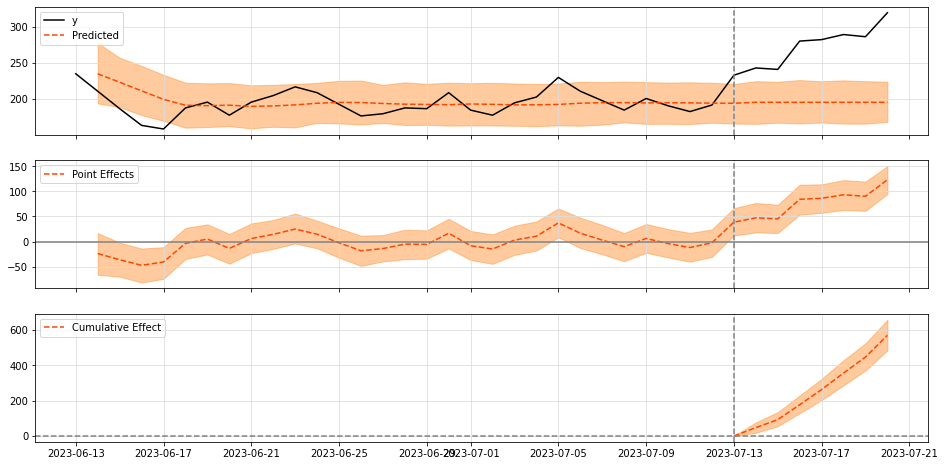

In [27]:
impact_posts.plot(figsize=(16, 8))

In [28]:
print(impact_posts.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    277.14             1940.0
Prediction (s.d.)         195.77 (5.99)      1370.4 (41.93)
95% CI                    [184.06, 207.54]   [1288.39, 1452.77]

Absolute effect (s.d.)    81.37 (5.99)       569.6 (41.93)
95% CI                    [69.6, 93.09]      [487.23, 651.61]

Relative effect (s.d.)    41.56% (3.06%)     41.56% (3.06%)
95% CI                    [35.55%, 47.55%]   [35.55%, 47.55%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


In [29]:
print(impact_posts.summary('report'))

Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 277.14. By contrast, in the absence of an
intervention, we would have expected an average response of 195.77.
The 95% interval of this counterfactual prediction is [184.06, 207.54].
Subtracting this prediction from the observed response yields
an estimate of the causal effect the intervention had on the
response variable. This effect is 81.37 with a 95% interval of
[69.6, 93.09]. For a discussion of the significance of this effect,
see below.


Summing up the individual data points during the post-intervention
period (which can only sometimes be meaningfully interpreted), the
response variable had an overall value of 1940.0.
By contrast, had the intervention not taken place, we would have expected
a sum of 1370.4. The 95% interval of this prediction is [1288.39, 1452.77].


The above results are given in terms of absolute numbers. In relative
terms, the response v

На основе представленного отчета, мы можем сделать следующие выводы:
1. В период флешмоба среднее значение количества постов составило около 277.14, тогда как без вмешательства (по предсказанию) ожидалось среднее значение около 195.77. Диапазон 95% доверительного интервала для предсказания без вмешательства составляет [184.06, 207.54].
2. Оценка причинного эффекта вмешательства составила 81.37.
3. Если суммировать отдельные точки данных в период флешмоба, то значение переменной ответа (количество постов) составляет 1940.0, в то время как без вмешательства ожидалось 1370.4. 
4. В относительных терминах переменная ответа показала увеличение на +41.56%. 
5. Положительный эффект, наблюдаемый в период вмешательства, является статистически значимым и маловероятно возникнувшим случайно (p = 0.0).


## Проверяем изменилось ли DAU

In [30]:
impact_dau = CausalImpact(data=pd.Series(df.dau),
                      pre_period=['2023-06-13', '2023-07-13'], 
                      post_period=['2023-07-14', '2023-07-20'])

2023-08-11 08:28:57.761457: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma/sample/InverseGamma/sample/PartitionedCall}}]]
2023-08-11 08:28:57.790314: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma/sample_1/InverseGamma/sample/PartitionedCall}}]]
2023-08-11 08:28:58.486221: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma_CONSTRUCTED_AT_joint_log_prob/sample/InverseGamma/sample/PartitionedCall}}]]
2023-08-11 08:

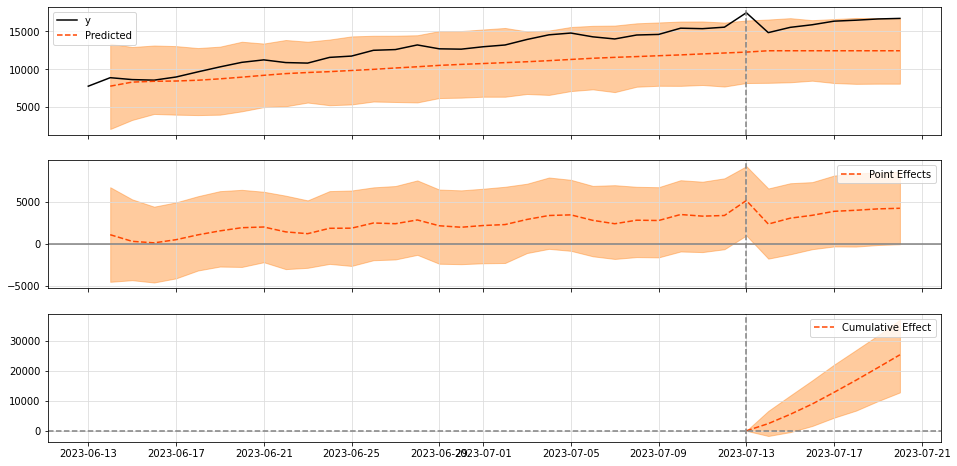

In [34]:
impact_dau.plot(figsize=(16, 8))

In [36]:
print(impact_dau.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    16052.71           112369.0
Prediction (s.d.)         12440.98 (888.39)  87086.88 (6218.7)
95% CI                    [10559.33, 14041.74][73915.31, 98292.18]

Absolute effect (s.d.)    3611.73 (888.39)   25282.12 (6218.7)
95% CI                    [2010.97, 5493.38] [14076.82, 38453.69]

Relative effect (s.d.)    29.03% (7.14%)     29.03% (7.14%)
95% CI                    [16.16%, 44.16%]   [16.16%, 44.16%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


In [37]:
print(impact_dau.summary('report'))

Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 16052.71. By contrast, in the absence of an
intervention, we would have expected an average response of 12440.98.
The 95% interval of this counterfactual prediction is [10559.33, 14041.74].
Subtracting this prediction from the observed response yields
an estimate of the causal effect the intervention had on the
response variable. This effect is 3611.73 with a 95% interval of
[2010.97, 5493.38]. For a discussion of the significance of this effect,
see below.


Summing up the individual data points during the post-intervention
period (which can only sometimes be meaningfully interpreted), the
response variable had an overall value of 112369.0.
By contrast, had the intervention not taken place, we would have expected
a sum of 87086.88. The 95% interval of this prediction is [73915.31, 98292.18].


The above results are given in terms of absolute numbers. In relative


На основе представленного отчета, мы можем сделать следующие выводы:
1. В период флешмоба среднее значение пользователей составило около 16052.71, тогда как без вмешательства (по предсказанию) ожидалось среднее значение около 12440.98. Диапазон 95% доверительного интервала для предсказания без вмешательства составляет [10559.33, 14041.74].
2. Оценка причинного эффекта вмешательства составила 3611.73.
3. Если суммировать отдельные точки данных в период флешмоба, то значение переменной ответа (количество пользователей) составляет 112369.0, в то время как без вмешательства ожидалось 87086.88. 
4. В относительных терминах переменная ответа показала увеличение на +29.03%. 
5. Положительный эффект, наблюдаемый в период вмешательства, является статистически значимым и маловероятно возникнувшим случайно (p = 0.0).

## Проверяем изменилось ли количеcтво лайков за день

In [39]:
impact_likes = CausalImpact(data=pd.Series(df.likes),
                      pre_period=['2023-06-13', '2023-07-13'], 
                      post_period=['2023-07-14', '2023-07-20']) 

2023-08-11 09:09:30.984441: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma/sample/InverseGamma/sample/PartitionedCall}}]]
2023-08-11 09:09:31.020361: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma/sample_1/InverseGamma/sample/PartitionedCall}}]]
2023-08-11 09:09:31.759316: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma_CONSTRUCTED_AT_joint_log_prob/sample/InverseGamma/sample/PartitionedCall}}]]
2023-08-11 09:

2023-08-11 09:09:52.590623: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'AdditiveStateSpaceModel/sample/AdditiveStateSpaceModel/sample_n_joint/scan/while/strided_slice/AdditiveStateSpaceModel/sample/AdditiveStateSpaceModel/sample_n_joint/concat_1' with dtype int32 and shape [2]
	 [[{{node AdditiveStateSpaceModel/sample/AdditiveStateSpaceModel/sample_n_joint/scan/while/strided_slice/AdditiveStateSpaceModel/sample/AdditiveStateSpaceModel/sample_n_joint/concat_1}}]]
2023-08-11 09:09:52.691951: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'AdditiveStateSpaceModel/sample/AdditiveStateSpaceModel/sample_n_joint/scan/whil

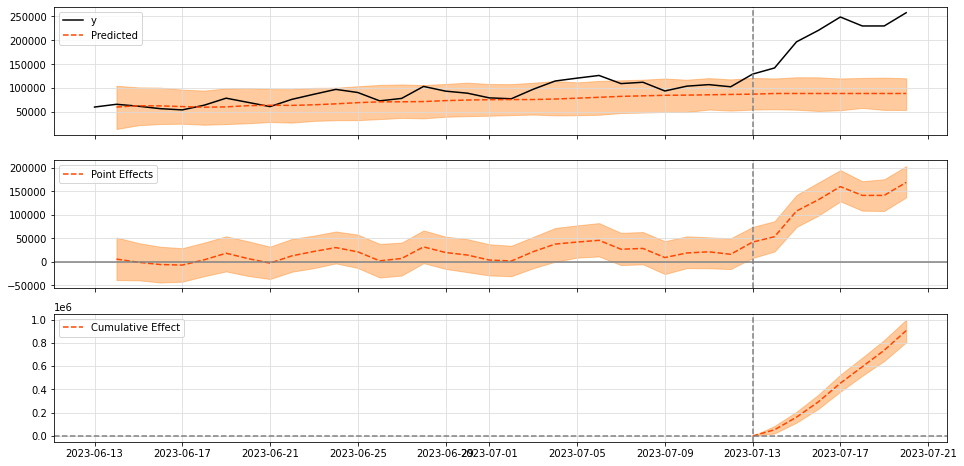

In [40]:
impact_likes.plot(figsize=(16, 8))

In [41]:
print(impact_likes.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    218090.14          1526631.0
Prediction (s.d.)         88792.23 (7181.07) 621545.62 (50267.48)
95% CI                    [74964.52, 103113.8][524751.67, 721796.6]

Absolute effect (s.d.)    129297.91 (7181.07)905085.38 (50267.48)
95% CI                    [114976.34, 143125.62][804834.4, 1001879.33]

Relative effect (s.d.)    145.62% (8.09%)    145.62% (8.09%)
95% CI                    [129.49%, 161.19%] [129.49%, 161.19%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


In [42]:
print(impact_likes.summary('report'))

Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 218090.14. By contrast, in the absence of an
intervention, we would have expected an average response of 88792.23.
The 95% interval of this counterfactual prediction is [74964.52, 103113.8].
Subtracting this prediction from the observed response yields
an estimate of the causal effect the intervention had on the
response variable. This effect is 129297.91 with a 95% interval of
[114976.34, 143125.62]. For a discussion of the significance of this effect,
see below.


Summing up the individual data points during the post-intervention
period (which can only sometimes be meaningfully interpreted), the
response variable had an overall value of 1526631.0.
By contrast, had the intervention not taken place, we would have expected
a sum of 621545.62. The 95% interval of this prediction is [524751.67, 721796.6].


The above results are given in terms of absolute numbers. In

На основе представленного отчета, мы можем сделать следующие выводы:
1. В период флешмоба среднее значение лайков составило около 218090.14, тогда как без вмешательства (по предсказанию) ожидалось среднее значение около 88792.23. Диапазон 95% доверительного интервала для предсказания без вмешательства составляет [74964.52, 103113.8].
2. Оценка причинного эффекта вмешательства составила 129297.91.
3. Если суммировать отдельные точки данных в период флешмоба, то значение переменной ответа (количество лайков) составляет 1526631.0, в то время как без вмешательства ожидалось 621545.62. 
4. В относительных терминах переменная ответа показала увеличение на +145.62%. 
5. Положительный эффект, наблюдаемый в период вмешательства, является статистически значимым и маловероятно возникнувшим случайно (p = 0.0).

## Проверяем изменилось ли количеcтво просмотров за день

In [43]:
impact_views = CausalImpact(data=pd.Series(df.views), 
                      pre_period=['2023-06-13', '2023-07-13'], 
                      post_period=['2023-07-14', '2023-07-20']) 

2023-08-11 09:15:31.808528: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma/sample/InverseGamma/sample/PartitionedCall}}]]
2023-08-11 09:15:31.846341: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma/sample_1/InverseGamma/sample/PartitionedCall}}]]
2023-08-11 09:15:32.616921: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma_CONSTRUCTED_AT_joint_log_prob/sample/InverseGamma/sample/PartitionedCall}}]]
2023-08-11 09:

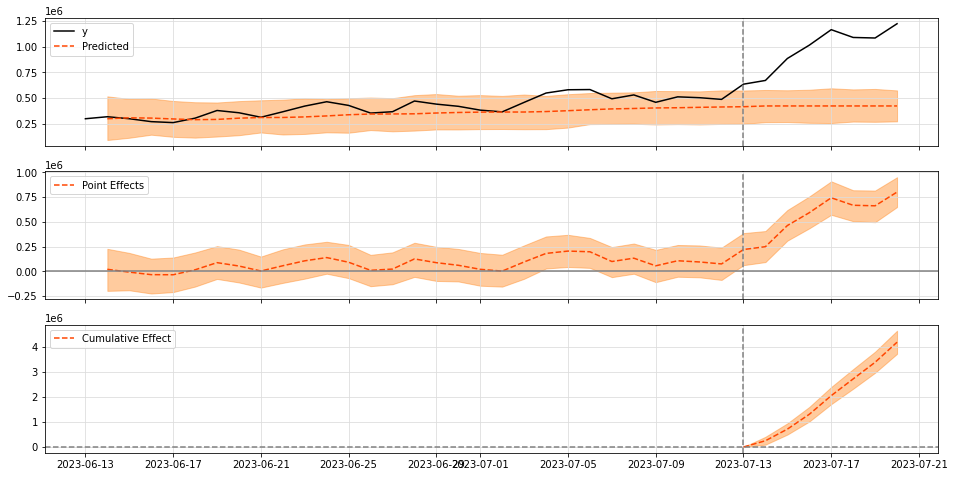

In [44]:
impact_views.plot(figsize=(16, 8))

In [45]:
print(impact_views.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    1019947.31         7139631.0
Prediction (s.d.)         423914.94 (32062.62)2967404.5 (224438.37)
95% CI                    [364170.37, 489853.55][2549192.49, 3428974.9]

Absolute effect (s.d.)    596032.38 (32062.62)4172226.5 (224438.37)
95% CI                    [530093.76, 655776.94][3710656.1, 4590438.51]

Relative effect (s.d.)    140.6% (7.56%)     140.6% (7.56%)
95% CI                    [125.05%, 154.7%]  [125.05%, 154.7%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


In [46]:
print(impact_views.summary('report'))

Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 1019947.31. By contrast, in the absence of an
intervention, we would have expected an average response of 423914.94.
The 95% interval of this counterfactual prediction is [364170.37, 489853.55].
Subtracting this prediction from the observed response yields
an estimate of the causal effect the intervention had on the
response variable. This effect is 596032.38 with a 95% interval of
[530093.76, 655776.94]. For a discussion of the significance of this effect,
see below.


Summing up the individual data points during the post-intervention
period (which can only sometimes be meaningfully interpreted), the
response variable had an overall value of 7139631.0.
By contrast, had the intervention not taken place, we would have expected
a sum of 2967404.5. The 95% interval of this prediction is [2549192.49, 3428974.9].


The above results are given in terms of absolute numbe

На основе представленного отчета, мы можем сделать следующие выводы:
1. В период флешмоба среднее значение просмотров составило около 1019947.31, тогда как без вмешательства (по предсказанию) ожидалось среднее значение около 423914.94. Диапазон 95% доверительного интервала для предсказания без вмешательства составляет [364170.37, 489853.55].
2. Оценка причинного эффекта вмешательства составила 596032.38.
3. Если суммировать отдельные точки данных в период флешмоба, то значение переменной ответа (количество просмотров) составляет 7139631.0, в то время как без вмешательства ожидалось 2967404.5. 
4. В относительных терминах переменная ответа показала увеличение на +140.6%. 
5. Положительный эффект, наблюдаемый в период вмешательства, является статистически значимым и маловероятно возникнувшим случайно (p = 0.0).

## Проверяем изменился ли CTR

In [47]:
impact_ctr = CausalImpact(data=pd.Series(df.ctr), 
                      pre_period=['2023-06-13', '2023-07-13'], 
                      post_period=['2023-07-14', '2023-07-20']) 

2023-08-11 09:19:16.905751: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma/sample/InverseGamma/sample/PartitionedCall}}]]
2023-08-11 09:19:16.940425: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma/sample_1/InverseGamma/sample/PartitionedCall}}]]
2023-08-11 09:19:17.684484: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma_CONSTRUCTED_AT_joint_log_prob/sample/InverseGamma/sample/PartitionedCall}}]]
2023-08-11 09:

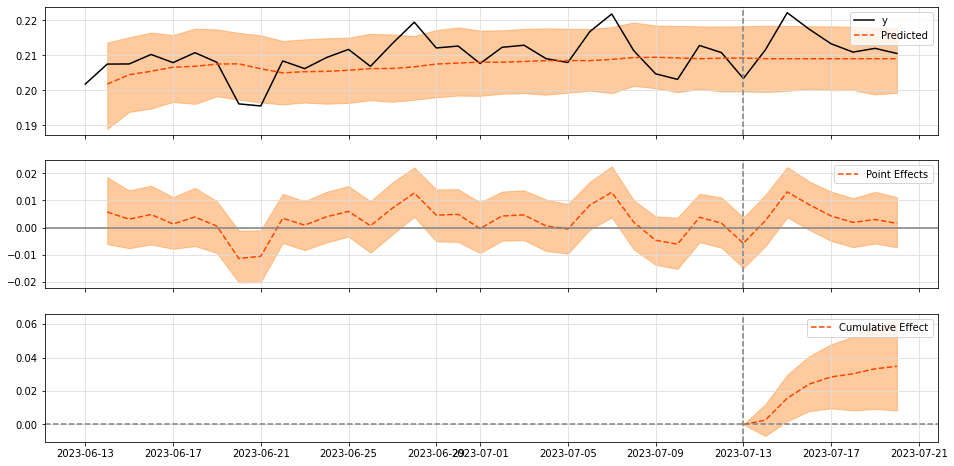

In [48]:
impact_ctr.plot(figsize=(16, 8))

In [49]:
print(impact_ctr.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    0.21               1.5
Prediction (s.d.)         0.21 (0.0)         1.46 (0.01)
95% CI                    [0.21, 0.21]       [1.44, 1.49]

Absolute effect (s.d.)    0.0 (0.0)          0.03 (0.01)
95% CI                    [0.0, 0.01]        [0.01, 0.06]

Relative effect (s.d.)    2.38% (0.94%)      2.38% (0.94%)
95% CI                    [0.47%, 4.17%]     [0.47%, 4.17%]

Posterior tail-area probability p: 0.01
Posterior prob. of a causal effect: 99.3%

For more details run the command: print(impact.summary('report'))


In [50]:
print(impact_ctr.summary('report'))

Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 0.21. By contrast, in the absence of an
intervention, we would have expected an average response of 0.21.
The 95% interval of this counterfactual prediction is [0.21, 0.21].
Subtracting this prediction from the observed response yields
an estimate of the causal effect the intervention had on the
response variable. This effect is 0.0 with a 95% interval of
[0.0, 0.01]. For a discussion of the significance of this effect,
see below.


Summing up the individual data points during the post-intervention
period (which can only sometimes be meaningfully interpreted), the
response variable had an overall value of 1.5.
By contrast, had the intervention not taken place, we would have expected
a sum of 1.46. The 95% interval of this prediction is [1.44, 1.49].


The above results are given in terms of absolute numbers. In relative
terms, the response variable showed an incre

На основе представленного отчета, мы можем сделать следующие выводы:
1. В период флешмоба среднее значение CTR оказалось равно CTR по предсказанию 0.21. 
Диапазон 95% доверительного интервала для предсказания без вмешательства составляет [0.21, 0.21].
2. Вычитая предсказание без вмешательства из наблюдаемого результата, мы получаем оценку причинного эффекта вмешательства 0.0, с доверительным интервалом 95% [0.0, 0.01].
3. Если суммировать отдельные точки данных в период флешмоба, то значение переменной ответа (CTR) составляет 1.5, в то время как без вмешательства ожидалось 1.46. Диапазон 95% доверительного интервала для предсказания без вмешательства составляет [1.44, 1.49].
4. В относительных терминах переменная ответа показала увеличение на +2.38% (с доверительным интервалом 95% [0.47%, 4.17%]).
5. Положительный эффект, наблюдаемый в период вмешательства, является статистически значимым и маловероятно возникнувшим случайно (p = 0.01).

В ситуации с CTR сложно сказать имеет ли это увеличение практическую значимость. Но отчет все-таки показывает, что данный показатель не возник случайно.

## Вывод: 
Как и преплолагалось флешмоб положительно повлиял на наши метрики. Во всех случаях CausalImpact показал увеличение метрик, и что наблюдаемый положительный эффект возник неслучайно.